In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
data_train_path = 'Fruits_Vegetables/train'
data_val_path = 'Fruits_Vegetables/validation'
data_test_path = 'Fruits_Vegetables/test'

In [3]:
img_width = 180
img_height = 180
batch_size = 32

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Using part of the training data as validation data
)

In [5]:
val_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
data_train = train_datagen.flow_from_directory(
    data_train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='sparse',
    subset='training'
)

Found 36 images belonging to 5 classes.


In [7]:
data_val = train_datagen.flow_from_directory(
    data_train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation'
)

Found 6 images belonging to 5 classes.


In [8]:
data_cat = list(data_train.class_indices.keys())
print(data_cat)

['apple', 'banana', 'chilli', 'guava', 'mango']


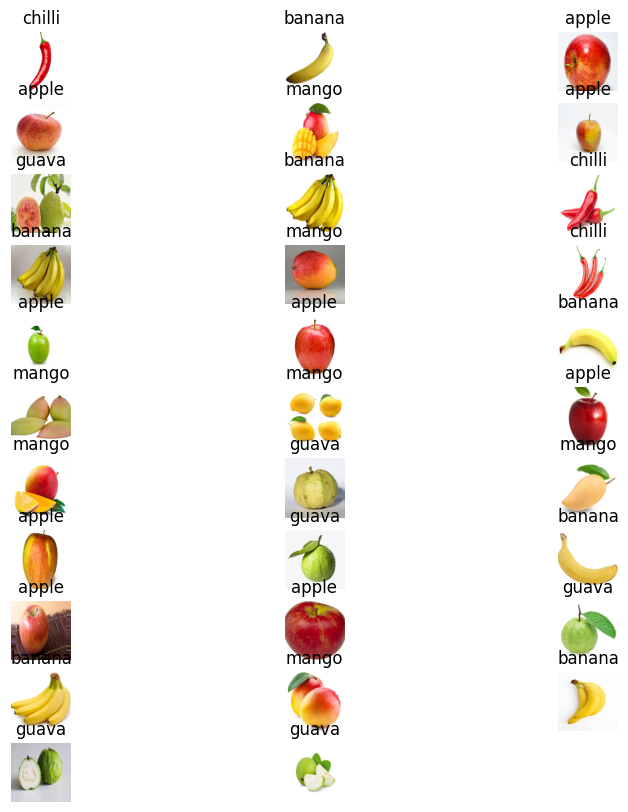

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in data_train:
    num_images = len(images)
    for i in range(min(num_images, 99)):
        plt.subplot(11, 3, i + 1)
        plt.imshow(images[i])
        plt.title(data_cat[int(labels[i])])
        plt.axis('off')
    break
plt.show()


In [10]:
model = keras.Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_width, img_height, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(data_cat))
])

c:\Users\huanc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [12]:
epochs_size = 50
history = model.fit(
    data_train,
    validation_data=data_val,
    epochs=epochs_size,
    verbose=1
)

Epoch 1/50


c:\Users\huanc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 547ms/step - accuracy: 0.2870 - loss: 1.7120 - val_accuracy: 0.3333 - val_loss: 1.4267
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 380ms/step - accuracy: 0.3519 - loss: 1.7057 - val_accuracy: 0.3333 - val_loss: 1.5488
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 319ms/step - accuracy: 0.4352 - loss: 1.4741 - val_accuracy: 0.3333 - val_loss: 1.4171
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - accuracy: 0.2789 - loss: 1.4796 - val_accuracy: 0.3333 - val_loss: 1.3315
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 306ms/step - accuracy: 0.4537 - loss: 1.3666 - val_accuracy: 0.6667 - val_loss: 1.2468
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 311ms/step - accuracy: 0.4051 - loss: 1.3324 - val_accuracy: 0.6667 - val_loss: 1.0910
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 306ms/step - accuracy: 0.4421 - loss: 1.2337 - val_accuracy: 0.6667 - val_loss: 1.0697
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 436ms/step - accuracy: 0.5185 - loss: 1.0406 - val_accuracy: 0.5000 - val_loss: 1.0321
Epo

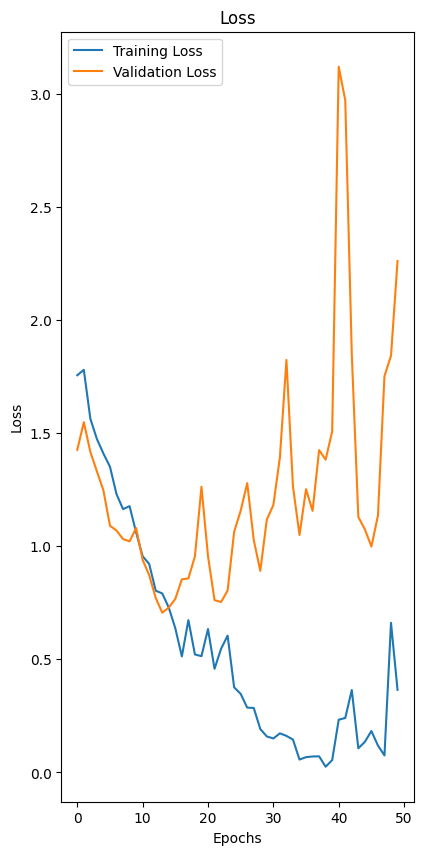

In [13]:
epochs_range = range(epochs_size)
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
image_path = 'chilli1.jpg'
image = keras.utils.load_img(image_path, target_size=(img_width, img_height))
img_array = keras.utils.img_to_array(image)
img_batch = np.expand_dims(img_array, axis=0)

In [15]:
predictions = model.predict(img_batch)
score = tf.nn.softmax(predictions[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


In [16]:
predicted_label_index = np.argmax(score)
accuracy = np.max(score) * 100
print(f'Veg/Fruit in image is {data_cat[predicted_label_index]} with accuracy of {accuracy:.2f}%')

Veg/Fruit in image is chilli with accuracy of 100.00%


In [17]:
model.save('Image_classify.keras')